# Fitting other Functions to Data

The least squares method is not confined to linear dta models, other types are useful. Many engineering applications are better represented by an exponential, logarithmic, power-law Models, or polynomial rather than a straight line.

### Exponential Data Models

An exponential model is

$$ y = \beta_0 e^{\beta_1 x} $$

where $\beta_0$ and $\beta_1$ are the model coefficients to be determined.

If we transform the model to

$$ ln y = ln\beta_0 + \beta_1 x $$ 

this result is linear in $ln\beta_0$ and $\beta_1$

The equivalent normal equations are

$$ \beta_1 = \frac{\sum_{i=1}^n x_i \sum_{i=1}^n ln(y_i) -n \sum_{i=1}^n x_i ln(y_i)  }{(\sum_{i=1}^n x_i)^2 -n \sum_{i=1}^n x_i^2} $$

$$ ln\beta_0 = \frac{1}{n}\sum_{i=1}^n ln(y_i) - \beta_1 \frac{1}{n} \sum_{i=1}^n x_i$$

#### Example 10-3

The transient behavior of a capacitor has been studied by measuring the voltage drop across the device as a function of time. The following data are observed

|Time(sec)|Voltage(V)|
|---:|---:|
|0|10.0|
|1| 6.1|
|2| 3.7|
|3| 2.2|
|4| 1.4|
|5| 0.8|
|6| 0.5|
|7| 0.3|
|8| 0.2|
|9| 0.1|
|11|0.07|
|12|0.03|

Fit an exponential function to the data set using a regression model.

#### Step 1 
Prepare the data set, log transform the response variable

In [1]:
t = [0,1,2,3,4,5,6,7,8,9,10,12]
v = [10.0,6.1,3.7,2.2,1.4,0.8,0.5,0.3,0.2,0.1,0.07,0.03]
import math
x = t
y = []
for i in range(len(x)):
    y.append(math.log(v[i]))
    

#### Step 2 
Load the necessary packages and build a dataframe from the data lists

In [2]:
#Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf # here is the regression package to fit lines
data = pd.DataFrame({'X':t, 'Y':y}) # we use X,Y as column names for simplicity
data.head()

,X,Y
0,0,2.302585
1,1,1.808289
2,2,1.308333
3,3,0.788457
4,4,0.336472


#### Step 3 
Fit a model keeping in mind we have transferred the y-axis to a logarithmic representation

In [3]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

#### Step 4
Prepare a plot, extract package values for display

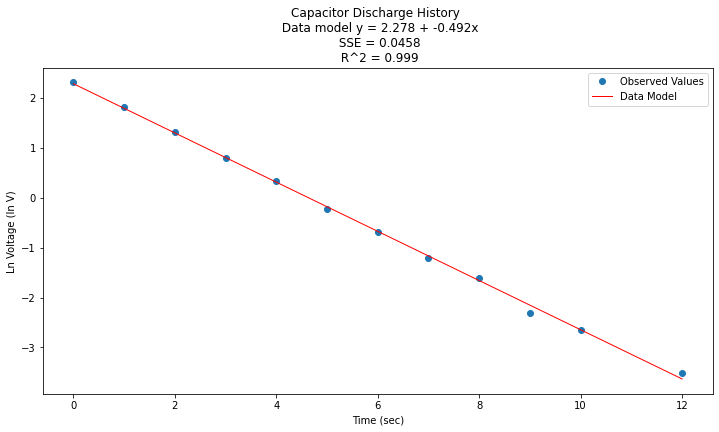

In [4]:
# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared

titleline = "Capacitor Discharge History \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel('Time (sec)')
plt.ylabel('Ln Voltage (ln V)')
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)

plt.show();

Now to return to original variables:

$y(x) = e^{\beta_0} e^{\beta_1 x} = e^{2.278} e^{-0.492 x}$

Now plotted in origional space

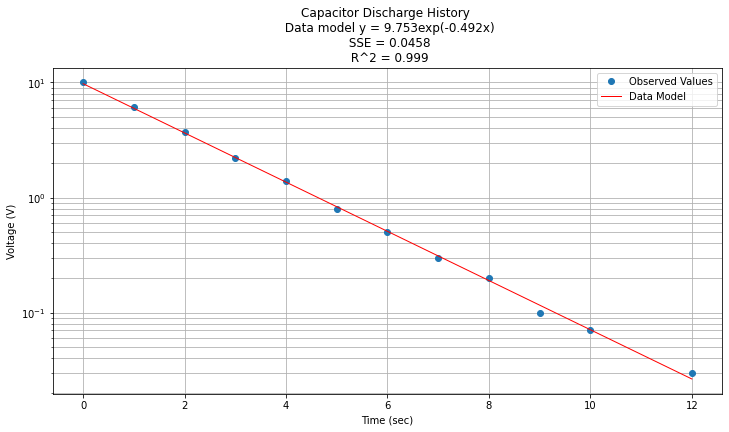

In [5]:
data['Yorg']=data['Y'].apply(math.exp)
data['Ymod']=math.exp(beta0)*(beta1*data['X']).apply(math.exp)
#data.head()

titleline = "Capacitor Discharge History \n Data model y = " + str(round(math.exp(beta0),3)) + "exp(" + str(round(beta1,3)) + "x)" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Yorg'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], data['Ymod'], 'r', linewidth=1)   # regression line
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.legend(['Observed Values','Data Model'])
plt.grid(which="both")
plt.title(titleline)

plt.show();

## Logarithmic Functions

Similar to the exponential case, another situation arises when the x-axis is logarithmic.  In this case the data model becomes

$$y = \beta_1 ln x + \beta_0$$

a least squares minimization leads to the following pair of normal equations

$$ \beta_1 = \frac{\sum_{i=1}^n ln(x_i) \sum_{i=1}^n y_i -n \sum_{i=1}^n ln(x_i) y_i  }{(\sum_{i=1}^n ln(x_i))^2 -n \sum_{i=1}^n ln(x_i)^2} $$

$$ \beta_0 = \frac{1}{n}\sum_{i=1}^n y_i - \beta_1 \frac{1}{n} \sum_{i=1}^n ln(x_i)$$

The process of analysis is the same as above except the x-axis is log transformed (and inverse transformed).

## Power-Law Models

A power-law model is of the form

$$y = \beta_0 x^{\beta_1}$$

The model is incredibly useful in engineering applications.

If the equation is log transformed as before the resulting model is

$$ln(y) = ln(\beta_0)+\beta_1 ln(x)$$

a least squares minimization leads to the following pair of normal equations

$$ \beta_1 = \frac{\sum_{i=1}^n ln(x_i) \sum_{i=1}^n ln(y_i) -n \sum_{i=1}^n ln(x_i) ln(y_i)  }{(\sum_{i=1}^n ln(x_i))^2 -n \sum_{i=1}^n ln(x_i)^2} $$

$$ \beta_0 = \frac{1}{n}\sum_{i=1}^n ln(y_i) - \beta_1 \frac{1}{n} \sum_{i=1}^n ln(x_i)$$

### Example 10-4

Consider a chemical engineer examining the rate at which a reactant is consumed in a reaction in the manufacture of a polymer.  The following data were obtained showing the reaction rate in moles/second as a function of the reactant moles/liter.  

|Concentration (mol/l)|Rate (mol/sec)|
|---:|---:|
|100|2.85|
| 80|2.00|
| 60|1.25|
| 40|0.67|
| 20|0.22|
| 10|0.072|
|  5|0.024|
|  1|0.0018|

Reaction rates of this type are often modeled using the reactant concentration raised to some power.

Here we will fit a power-law model to the data and report the result.  First in this case a plot is in order to get an idea of the relationship.

#### Step 1

Prepare data lists and make a plot to explore data cloud shape

In [6]:
conc = [100,80,60,40,20,10,5,1]
rate = [2.85,2.00,1.25,0.67,0.22,0.072,0.024,0.0018]
import math
x = conc
y = rate

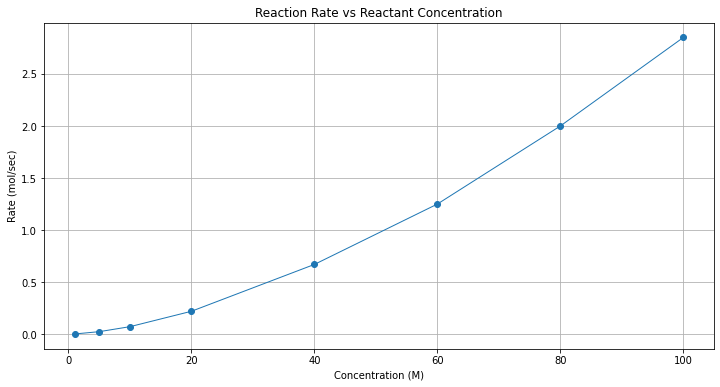

In [7]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linewidth=1)           # scatter plot showing actual data
plt.xlabel('Concentration (M)')
plt.ylabel('Rate (mol/sec)')
#plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title("Reaction Rate vs Reactant Concentration");

#### Step 2

Assess model to choose.  Clearly not a straight line, try log-log scales 

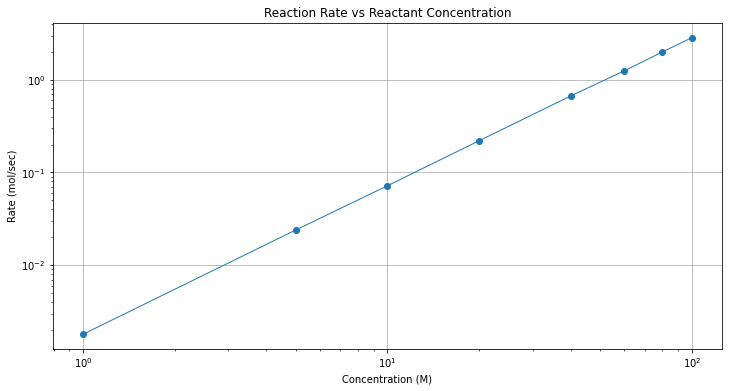

In [8]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linewidth=1)           # scatter plot showing actual data
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.xlabel('Concentration (M)')
plt.ylabel('Rate (mol/sec)')
#plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title("Reaction Rate vs Reactant Concentration");

Wow! The log-log plot is quite good.  A log-log plot is evidence that a power-law model might be a good data model.

#### Step 3

Build the the design "dataframes" from our lists

In [9]:
data = pd.DataFrame({'X':x, 'Y':y}) # we use X,Y as column names for simplicity
data['lnX']=data['X'].apply(math.log)
data['lnY']=data['Y'].apply(math.log)
data.head()

,X,Y,lnX,lnY
0,100,2.85,4.605170,1.047319
1,80,2.00,4.382027,0.693147
2,60,1.25,4.094345,0.223144
3,40,0.67,3.688879,-0.400478
4,20,0.22,2.995732,-1.514128


#### Step 4

Now fit a linear model to the log-log part of the dataframe

In [10]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('lnY ~ lnX', data=data) # model object constructor syntax
model = model.fit()

Now predict and plot results

In [11]:
# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared


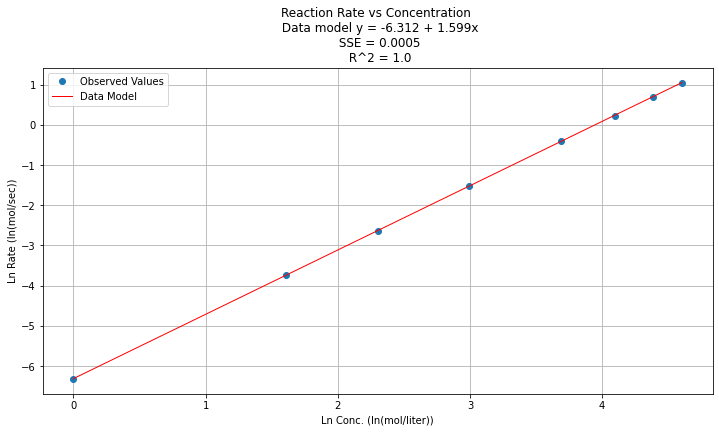

In [12]:
titleline = "Reaction Rate vs Concentration \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,4)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['lnX'], data['lnY'], 'o')           # scatter plot showing actual data
plt.plot(data['lnX'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel('Ln Conc. (ln(mol/liter))')
plt.ylabel('Ln Rate (ln(mol/sec))')
plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title(titleline)

plt.show();

#### Step 5

Now to return to original variables:

$y(x) = e^{\beta_0} x^{\beta_1 } = e^{-6.312} x^{1.599}$

Plotted in origional space (but use a log-log scale on both axes), and decorate with gridlines, titles, legend.

In [13]:
data['Ymod']=math.exp(beta0)*(data['X']**beta1)
data.head()

,X,Y,lnX,lnY,Ymod
0,100,2.85,4.605170,1.047319,2.863215
1,80,2.00,4.382027,0.693147,2.004008
2,60,1.25,4.094345,0.223144,1.265110
3,40,0.67,3.688879,-0.400478,0.661556
4,20,0.22,2.995732,-1.514128,0.218390


In [14]:
titleline = "Reaction Rate vs Concentration \n Data model y = " + str(round(math.exp(beta0),3)) + "x^(" + str(round(beta1,3)) + ")" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

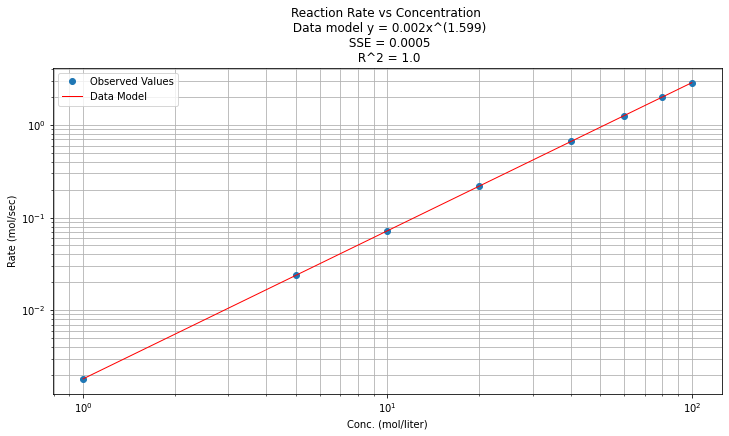

In [15]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], data['Ymod'], 'r', linewidth=1)   # regression line
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.xlabel('Conc. (mol/liter)')
plt.ylabel('Rate (mol/sec)')
plt.legend(['Observed Values','Data Model'])
plt.grid(which='both')
plt.title(titleline)

plt.show();